In [11]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import os

# Dodane przez KS
import joblib
import sys
sys.path.append('..')
from src.data import load_dataset

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import shap

ModuleNotFoundError: No module named 'shap'

In [12]:
X, y = load_dataset()
y = LabelEncoder().fit_transform(y)

In [13]:
precision_accum, recall_accum, f1_accum, support_accum = 0, 0, 0, 0

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    model = MLPClassifier(hidden_layer_sizes=(5))
    model.fit(X_train, y_train)
    
    X_test = scaler.transform(X_test)
    y_pred = model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    precision_accum += precision
    recall_accum += recall
    f1_accum += f1

n_splits = kf.get_n_splits()
print(f"Average Precision: {precision_accum / n_splits:.2f}")
print(f"Average Recall: {recall_accum / n_splits:.2f}")
print(f"Average F1-Score: {f1_accum / n_splits:.2f}")

0it [00:00, ?it/s]

5it [00:39,  7.93s/it]

Average Precision: 0.85
Average Recall: 0.85
Average F1-Score: 0.85


In [ ]:
# Dodane przez KS
os.makedirs('../models', exist_ok=True)
joblib.dump(model, '../models/mlp_model.pkl')

['../models/mlp_model.pkl']

In [ ]:
def shap_explain(model, X_train, X_test, colnames):
    explainer = shap.Explainer(model.predict, X_train, feature_names=colnames)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values)
    shap.waterfall_plot(shap_values[0])

C:\Users\Ziemowit\AppData\Local\Temp\ipykernel_20888\2046851665.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


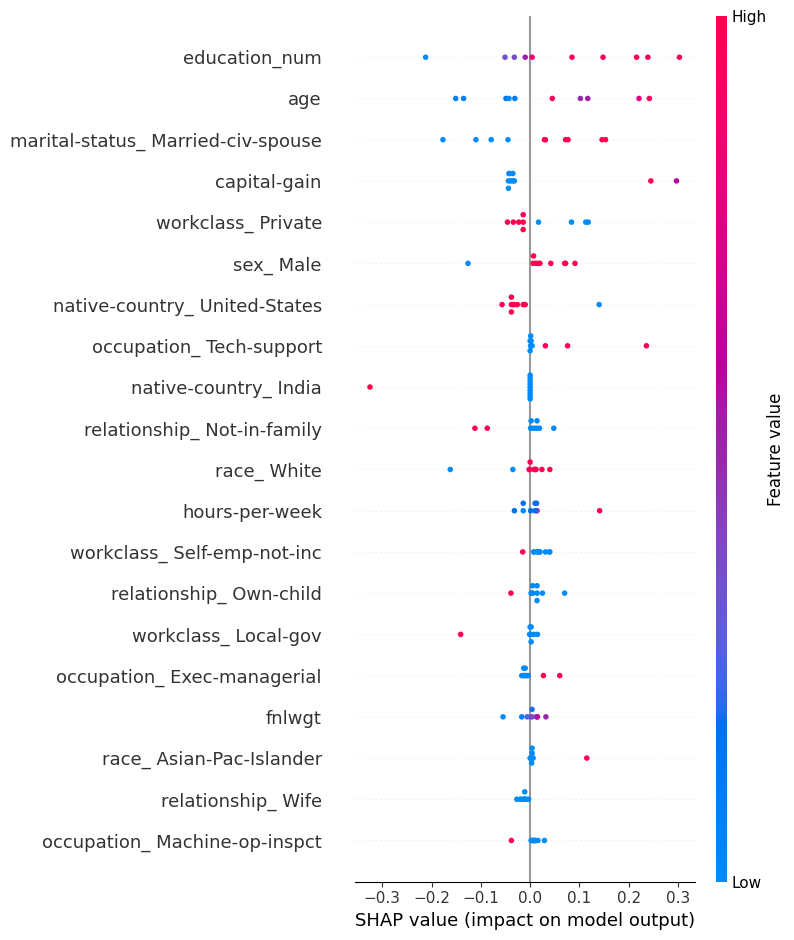

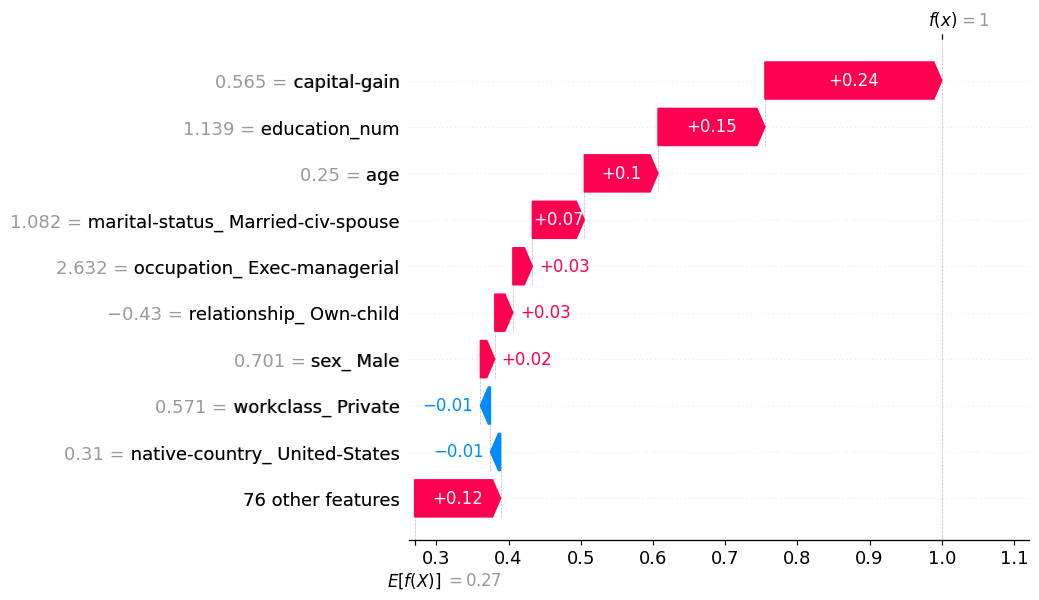

In [ ]:
shap_explain(model, X_train[:100], X_test[:10], X.columns)